### Import all the necessary libraries

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

1) Import the CSV file 
2) Check the first 5-10 rows and check the necessary information for further analysis
3) Check the columns and align it with the dictionary provided

In [2]:
df_bike = pd.read_csv("C:\\Users\\prasa\\OneDrive\\Documents\\Anu\\day.csv")
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(df_bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


### In the next section we are going to do some exploratory data analysis on the data provided

Initially check if there is any null data in the provided data set

From the below statement we could easily infer that there are no null values in the provided data set and it seems to be clean

In [4]:
print(df_bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Rename the columns to more meaningful names to understand the model better further

In [5]:
df_bike.rename(columns = {'dteday' : 'Date','yr' : 'Year','hum' :'humidity','cnt':'count'},inplace=True)
print(df_bike.columns)

Index(['instant', 'Date', 'season', 'Year', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


Check if we could drop certain columns based on the information they carry. In the above data set and as per the dictionary provided,
   1) "Instant" contains index
   2) "Date" contains date/month/year where month and year are already separate columns 
   3) Since we are building our model based on cnt or count, "Casual" contains count of casual users, "Registered" contains count of registered users, we could discard these 2 columns and keep the count column only
   
 Hence these are the columns that could be dropped and further analysis carried out
   

In [6]:
df_bike = df_bike.drop(["instant","Date","casual","registered"], axis = 1)
df_bike.head()

,season,Year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
df_bike.shape

(730, 12)

### Most of the EDA is now completed and the dataset looks pretty clean, now we could proceed with analysis, model building part

Lets try to visualise the numerival variables in the given dataset. The below are the numerical variables:
1) temperature
2) Feeling_Temp
3) humidity
4) windspeed
5) count

We could plot a pairplot and compare the co-relations between these variables

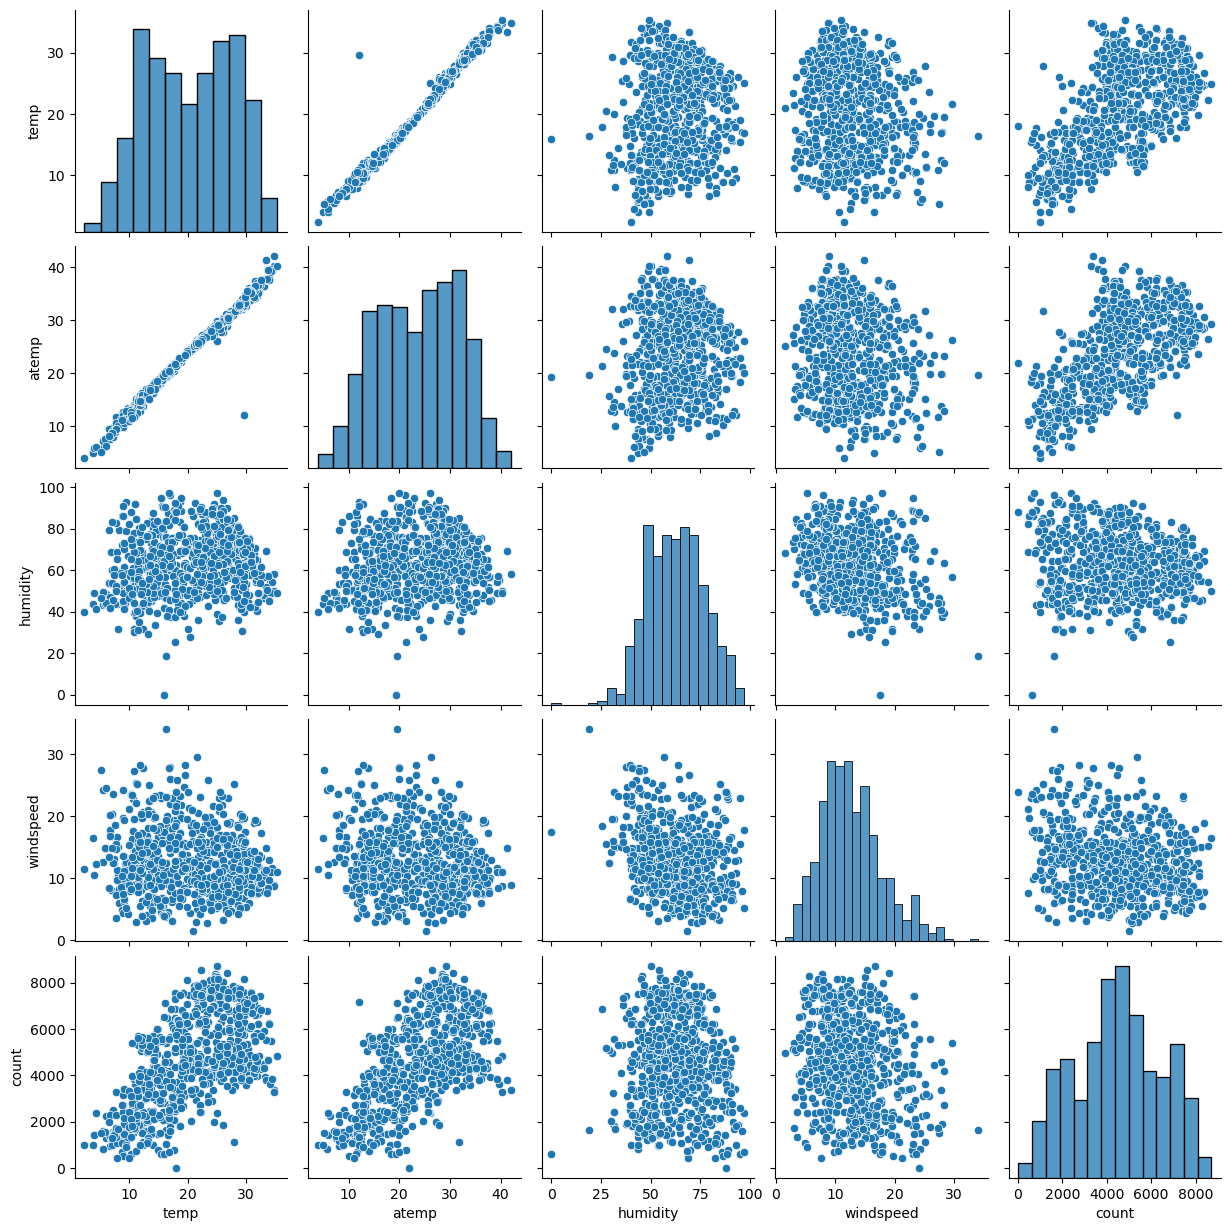

In [8]:
sns.pairplot(data = df_bike, vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

### Conclusion

As we can observe from the above plot the visualisation between the numerical variables and count has a positive correlation and hence a linear regression model could be considered for analysis

In the next step lets visualise the categorical variables by plotting box plots and see if we could get some meaningful insights from it

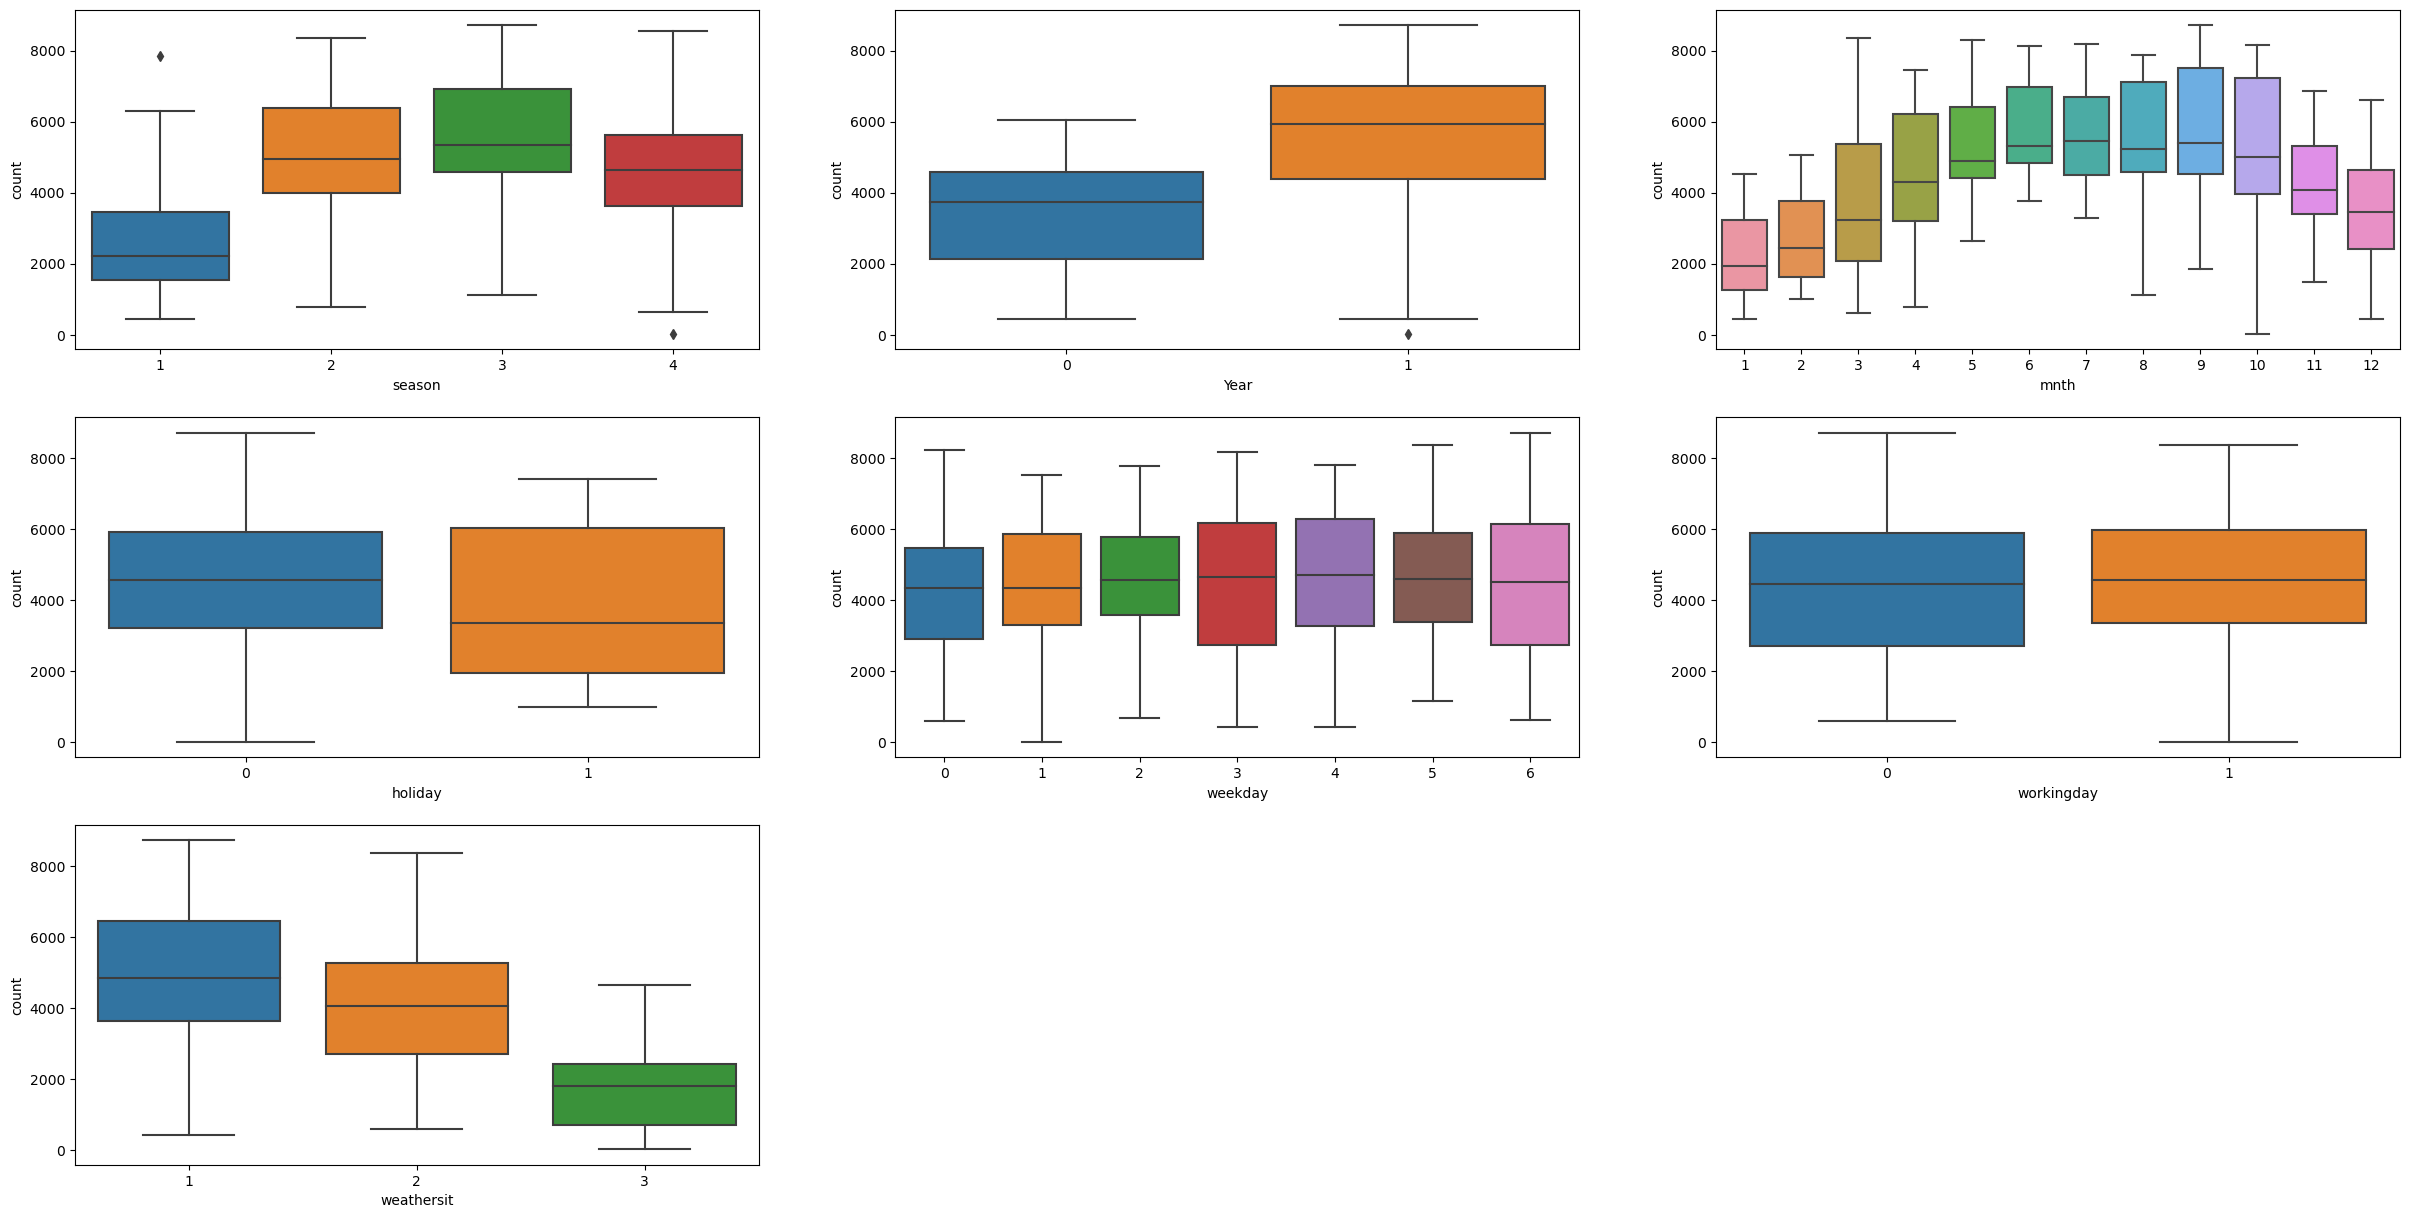

In [9]:
plt.figure(figsize=(30,15))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='count', data=df_bike)

plt.subplot(3,3,2)
sns.boxplot(x='Year',y='count', data=df_bike)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='count', data=df_bike)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='count', data=df_bike)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='count', data=df_bike)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='count', data=df_bike)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='count', data=df_bike)

plt.show()

### Analysis

In the above plots we could observe the following things:

1) The count of rental bikes is highest during the fall and summer season
2) The count of rental bikes is highest in the year 2019
3) The count of rental bikes again is highest during the months from april to september
4) The count of renting is lesser if its a holiday
5) The count of rental bikes is higher if its clear weather

#### Let us map the binary values in the data set to meaningul values so that it could be used further in our analysis

In [10]:
sharing_bike = df_bike[['season', 'Year', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed','count']]
sharing_bike.head()

,season,Year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Mapping Months
sharing_bike['mnth'] = sharing_bike['mnth'].apply(lambda x: calendar.month_abbr[x])

In [12]:
# Mapping Seasons
sharing_bike.season = sharing_bike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [13]:
# Mapping weathersit
sharing_bike.weathersit = sharing_bike.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [14]:
# Mapping Weekday
sharing_bike.weekday = sharing_bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [15]:
sharing_bike.head()

,season,Year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Proceeding further, let us create dummy variables for the categorical variables and assign them to the dataset accordingly

The categorical variables in the given data set are:

1) Season
2) Month
3) Weekday
4) weatherSit

Since Year and holiday represent binary values already dummy variables are not required

In [16]:
dummy_categorical = sharing_bike[['season','mnth','weekday','weathersit']]

In [17]:
dummy_categorical = pd.get_dummies(dummy_categorical, drop_first=True)
dummy_categorical

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Add all the dummy data obtained to the original dataset

In [18]:
bike_sharing = pd.concat([dummy_categorical,sharing_bike,],axis=1)
bike_sharing.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Now that the dummy variables are created and merged with the dataframe, we shall drop the original columns

In [19]:
bike_sharing.drop(['season'],axis=1, inplace = True)
bike_sharing.drop(['mnth'],axis=1, inplace = True)
bike_sharing.drop(['weekday'],axis=1, inplace = True)
bike_sharing.drop(['weathersit'],axis=1, inplace = True)
bike_sharing.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_sharing[['temp','atemp','humidity','windspeed','count']] = bike_sharing[['temp','atemp','humidity','windspeed','count']].apply(pd.to_numeric)

### The dataset is now ready and we can proceed with the model training and testing and further analysis 

In [21]:
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


Before we proceed with further analysis we shall do an additional step of scaling to adjust the co-efficients in the dataset. Here we are taking min-max scaling method

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

In [23]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,atemp,humidity,windspeed,count
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


In [24]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### In the next step the idea is to plot a co-relation matrix to find out which variables have the highest co-relation matrix with the target variable count

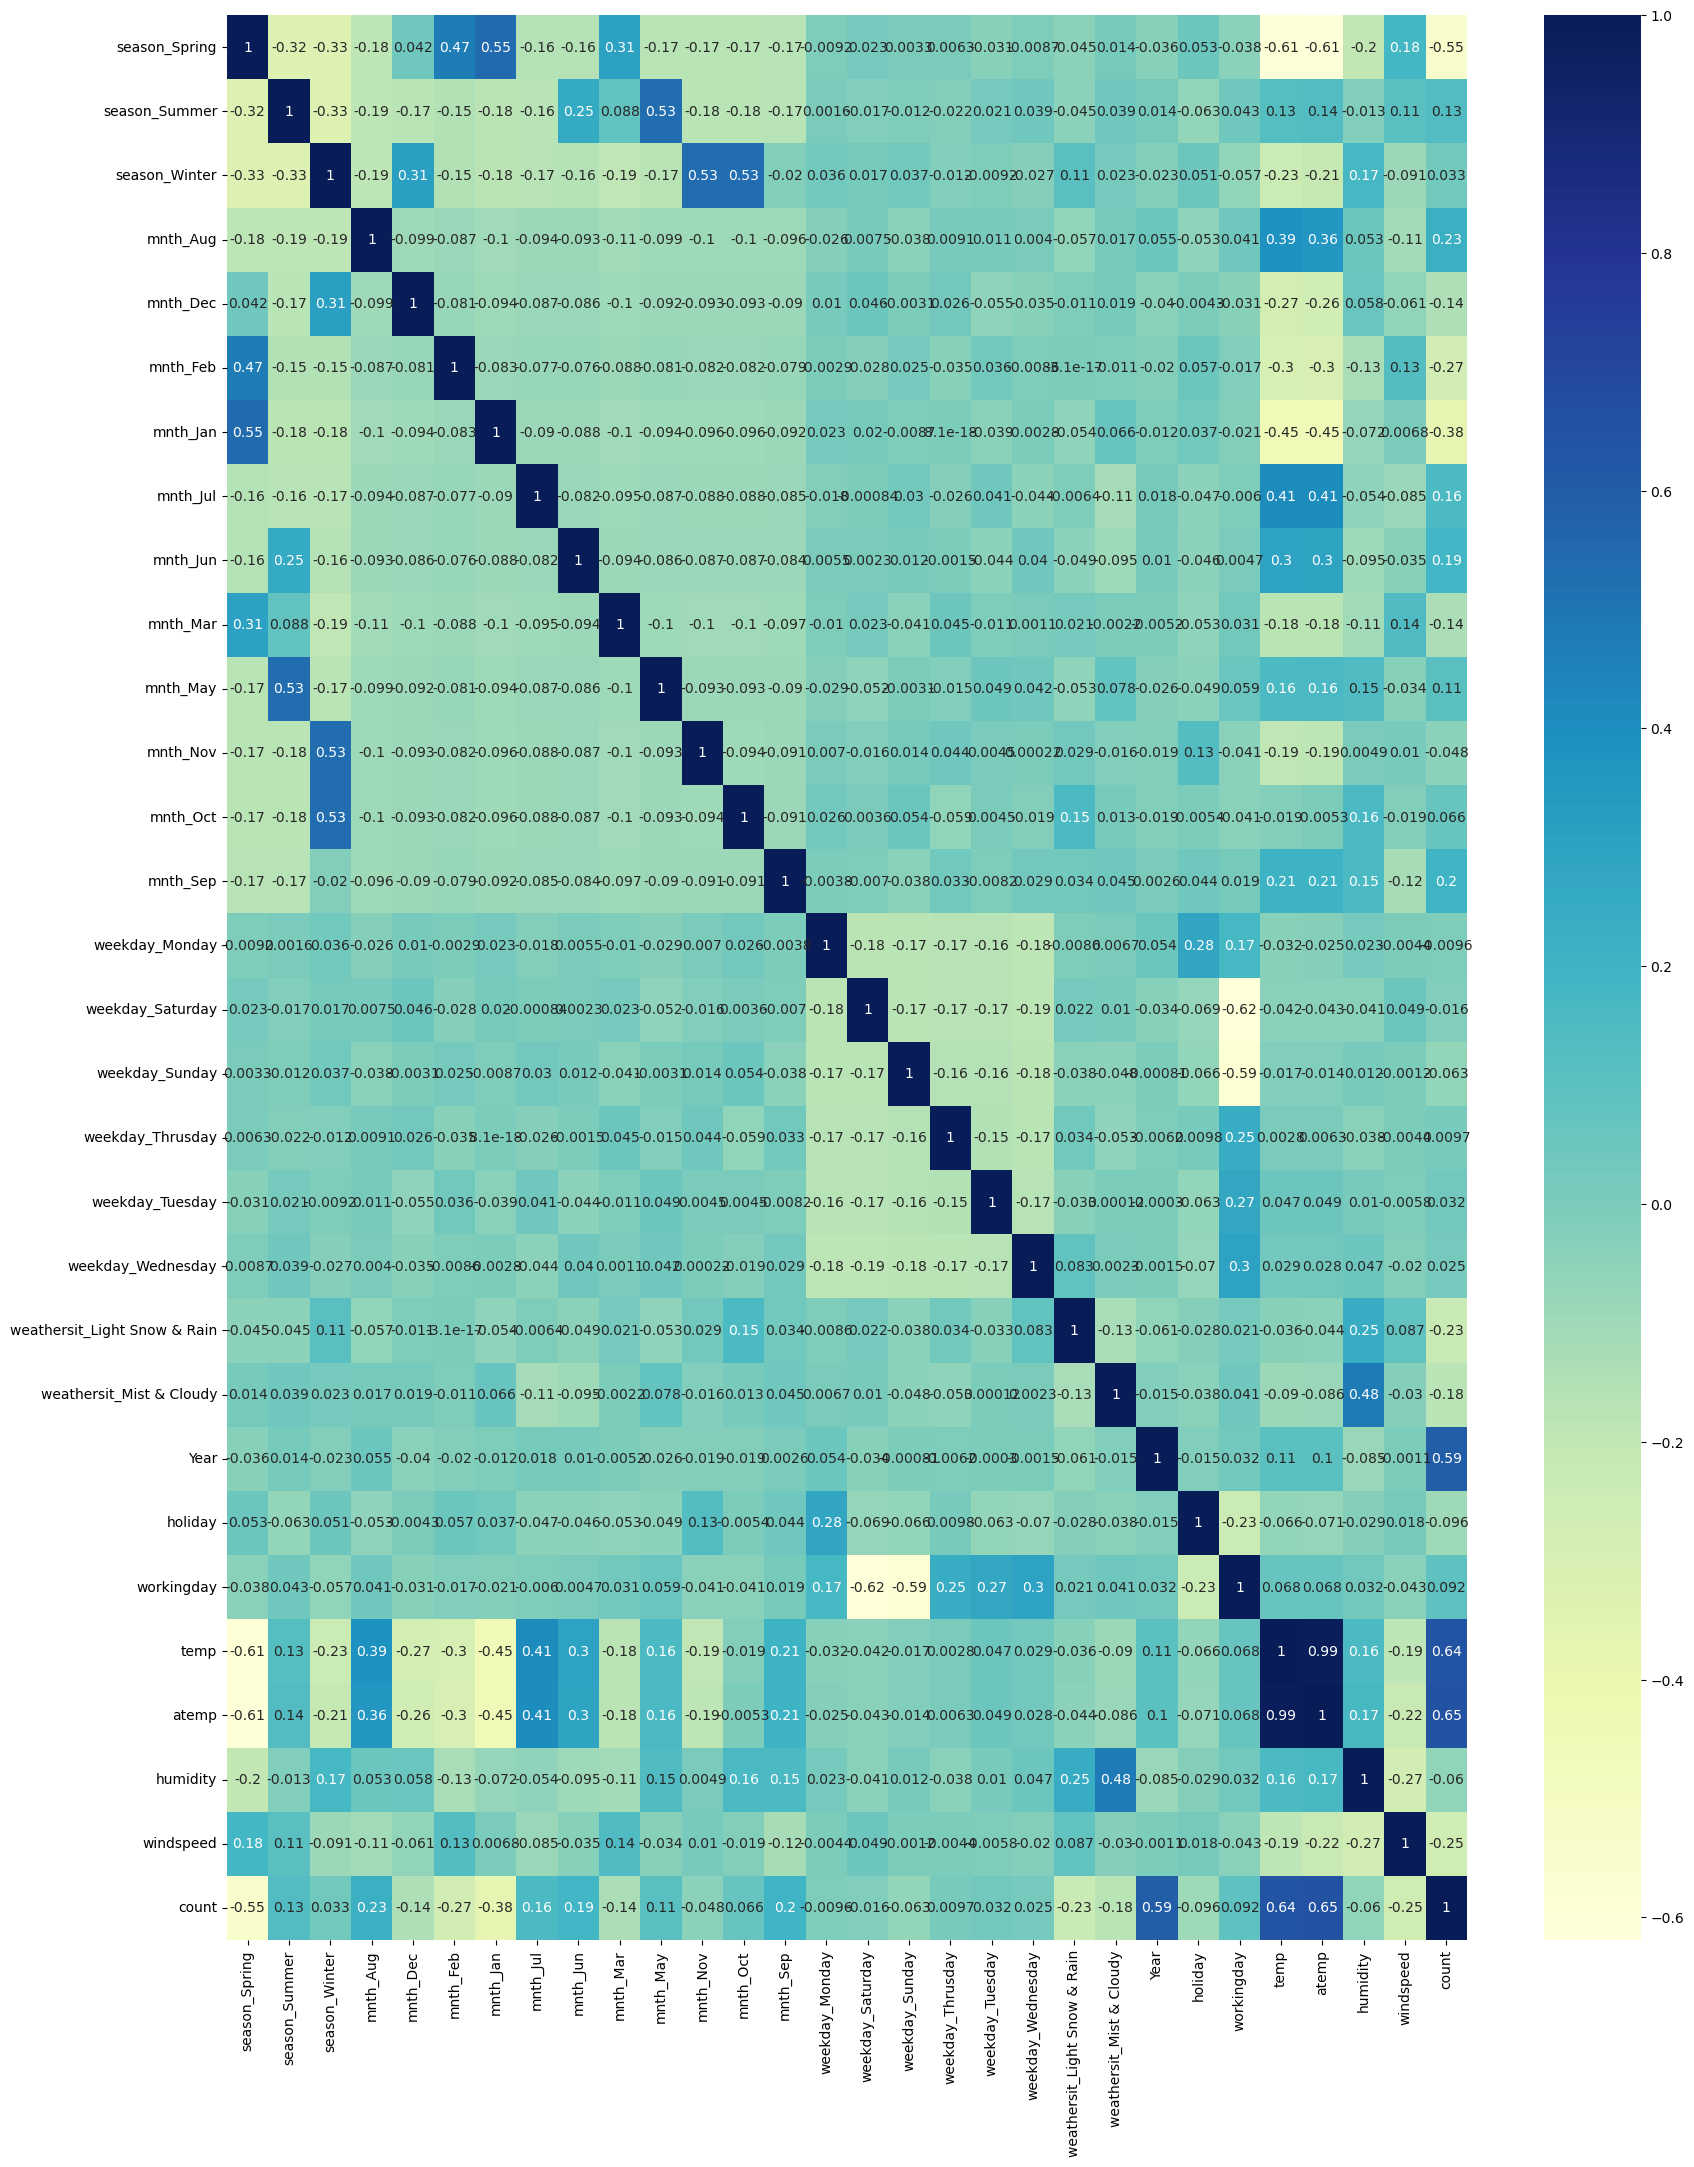

In [25]:
plt.figure(figsize = (20,25))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### From the above co-relation matrix we could easily infer that there is a high corelation matrix between temperature,feeling temperature in Celsius and count. We cannot infer much about the other variables. Hence we continue with further analysis with the test data

#### Divide into X and Y sets for model Building

In [26]:
y_train = df_train.pop('count')
X_train = df_train

In [27]:
y_train.shape
X_train.shape

(510, 29)

## There are 2 kinds of analysis that we could do on the dataset provided. One is using the Linear Regression model provided by SciKit learn model because of its compatibility with RFE and the other one without using RFE

#### In this jupyter notebook the analysis is done using RFE

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [30]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'Year',
       'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

#### Now lets build the model using statsmodel, for detailed statistics. Before this we should add a constant variable

In [32]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,Year,holiday,workingday,temp,humidity,windspeed
653,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [33]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
X_train_rfe1.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,Year,holiday,workingday,temp,humidity,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


Run the linear model and now check the results and summary

In [34]:
lm_1 = sm.OLS(y_train,X_train_rfe1).fit()
lm_1.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
Year                            0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
humidity                       -0.154716
windspeed                      -0.185956
dtype: float64

In [35]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          2.31e-191
Time:                        16:41:24   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

All the columns have the P value less than 0.05. Hence we need not drop any columns for further analysis

#### In the next step we check the VIF for the model and see if there are any columns which has a VIF greater than 5

In [36]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,humidity,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


In the above results we observe that the VIF value for constant is too high and hence we could directly drop it. We consider VIF for those features only where the value is lesser than 5

In [37]:
X_train_rfe1 = X_train_rfe1.drop(['const'], axis=1)

Calculating the VIF for the new model again after dropping constant

In [38]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,Year,2.09
6,weekday_Saturday,1.98


Again in the above VIF analysis we see that humidity has a high VIF value but the P value still remains under 0. Hence lets continue eliminating the next column humidity and continue with our analysis

In [39]:
X_train_rfe1 = X_train_rfe1.drop(['humidity'], axis=1)

In [40]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,Year,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


Since the temperature again has a VIF value greater than 5 we could drop it and check how the model appears to be

In [41]:
X_train_rfe1 = X_train_rfe1.drop(['temp'], axis=1)

In [42]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.27
11,workingday,3.83
0,season_Spring,2.97
1,season_Summer,2.27
2,season_Winter,1.99
9,Year,1.91
6,weekday_Saturday,1.69
3,mnth_Jan,1.60
8,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.30


#### Let us go ahead and prepare the final model

In [43]:
X_train_lm1 = sm.add_constant(X_train_rfe1)

In [45]:
lm_1 = sm.OLS(y_train,X_train_lm1).fit()

In [46]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          4.04e-154
Time:                        16:47:15   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

As we can see in the above analysis the P value for all the fields is within 0 and 1 and hence we could consider this as our final model

Calculating VIF for the newly built model again

In [48]:
vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.27
11,workingday,3.83
0,season_Spring,2.97
1,season_Summer,2.27
2,season_Winter,1.99
9,Year,1.91
6,weekday_Saturday,1.69
3,mnth_Jan,1.60
8,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.30


#### We could consider LM_1 as our final model since the P values are within 0 and 1 and the VIF values as well are well within 5. Hence we could proceed with further steps

#### Residual Analysis of the train data

Plotting a histogram to check if the error terms are normally distributed

In [50]:
y_train_count = lm_1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

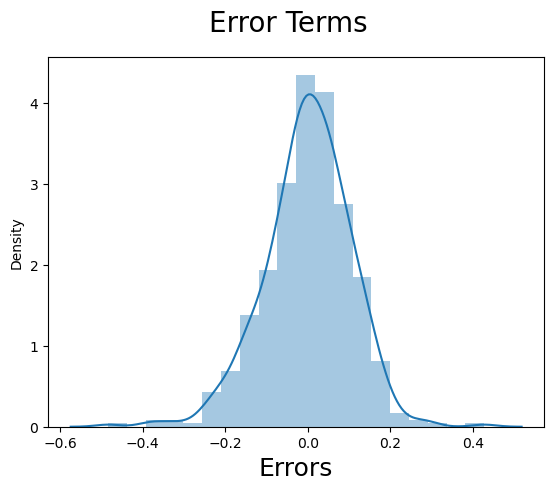

In [52]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  

As we can see in the above histogram the error terms are normally distributed and there is no huge deviation. 

#### Using the above model we could now make predictions on the test data

We shall follow the same process that we followed for the train data.
1) We shall Scale the test data
2) Add constant to test data
3) Use the train model and predict data for the test set

In [54]:
num_vars = ['temp','atemp','humidity','windspeed','count']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test[num_vars].head()

,temp,atemp,humidity,windspeed,count
184,0.837241,0.778767,0.534223,0.149393,0.704300
535,0.911423,0.855132,0.470417,0.231142,0.725421
299,0.496221,0.492359,0.777843,0.443398,0.278853
221,0.890387,0.805661,0.236659,0.449707,0.545512
152,0.821739,0.749249,0.070765,0.682387,0.569148


In [55]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us divide the data into X_test and y_test as we did for train data

In [58]:
y_test = df_test.pop('count')
X_test = df_test

In [59]:
X_test = sm.add_constant(X_test)

#### Lets predict the values using the final model

In [60]:
col_test = X_train_lm1.columns
X_test = X_test[col_test[1:]]

In [61]:
X_test = sm.add_constant(X_test)

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weekday_Saturday              219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  Year                          219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  wind

Make Predictions for the final model

In [67]:
y_pred = lm_1.predict(X_test)

Let us now do the R-squared calculations

In [68]:
r2_score(y_test, y_pred)

0.720425034837237

#### R-squared tests on the test set is 0.72 and on the train set is 0.78. This shows that the predicted model matches with the train data set

#### Final Step - Model Evaluation - Plot a graph to understand the actual vs predicted values

Text(0, 0.5, 'y_pred')

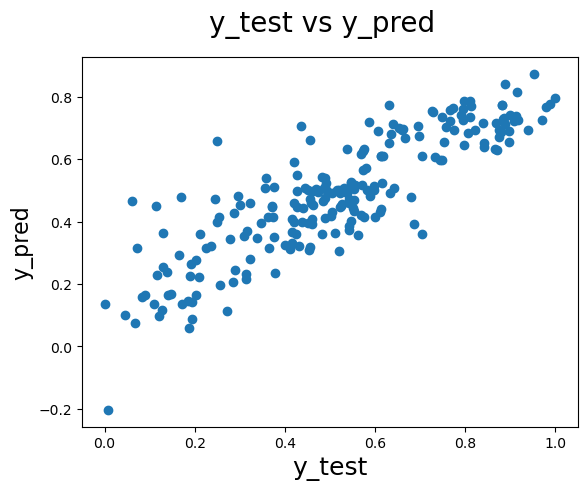

In [69]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16)

As the model indicateswe can safely assume that the predicted model and the test model are in sync

#### Analyse variable names and co-efficient values for the final result

In [74]:
param = pd.DataFrame(lm_1.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.544807
10,Year,0.247764
6,mnth_Sep,0.070843
7,weekday_Saturday,0.056390
12,workingday,0.048020
5,mnth_Jul,-0.009855
2,season_Summer,-0.044001
11,holiday,-0.057113
3,season_Winter,-0.074896


#### Final Conclusion

The equation for best fitted line could be calculated as follows
count = 0.5448 + 0.2477 X yr + 0.0708 X mnth_Sep + 0.0563 X weekday_Saturday + 0.0480 X workingday -0.0098 X mnth_Jul - 0.044 X season_Summer - 0.0571 X holiday - 0.0748 X season_Winter - 0.0896 X Weathersit_mist & Cloudy - -0.10244 X mnth_Jan - 0.18783 X windspeed - 0.2602  X season_spring -0.3044 X Weathersit_light Snow and Rain

All the positive coefficients like year, workingday indicate that an increase in these values will lead to an increase in the value of Count and all the negative coefficients indicate that an increase in these values will lead to a decrease in the value of count.

Bike Sharing is higher in the month of September and also higher on a Saturday and working day. Rentals go down on a holiday and during winter months.